In [1]:
import pandas as pd

## 数据读取与数据分析

In [8]:
train_df = pd.read_csv('./dataset/train_set.csv', sep='\t', nrows=1000)

In [9]:
# 句子长度分析
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
train_df['text_len'].describe()

count     1000.00000
mean       904.30900
std        929.32823
min         21.00000
25%        367.00000
50%        656.00000
75%       1102.50000
max      10018.00000
Name: text_len, dtype: float64

Text(0.5, 1.0, 'Histogram of char count')

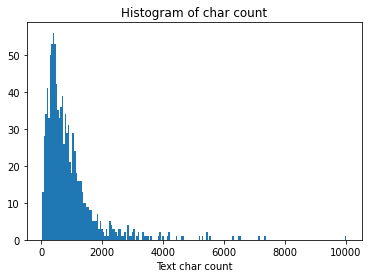

In [11]:
# 直方图
import matplotlib.pyplot as plt
plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title('Histogram of char count')

Text(0.5, 0, 'category')

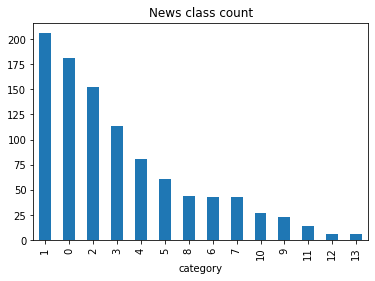

In [12]:
# 新闻类别分布
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel('category')

In [13]:
# 字符分布统计
from collections import Counter
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(' '))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse=True)
print(len(word_count))
print(word_count[0])
print(word_count[-1])

3969
('3750', 37255)
('5556', 1)


## 基于机器器学习的⽂文本分类

In [16]:
# Bag of word
# 也称count vectors 每个文档的字/词可以使用其出现次数来进行表示
# https://blog.csdn.net/lyn5284767/article/details/85316931
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
vectorizer.fit_transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [17]:
vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [18]:
vectorizer.vocabulary_

{'this': 8,
 'is': 3,
 'the': 6,
 'first': 2,
 'document': 1,
 'second': 5,
 'and': 0,
 'third': 7,
 'one': 4}

In [19]:
# 基于机器学习的文本分类
# Count Vectors + RidgeClassifier
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

train_df = pd.read_csv('./dataset/train_set.csv', sep='\t', nrows=15000)
vectorizer = CountVectorizer(max_features=3000)
train_test = vectorizer.fit_transform(train_df['text'])

clf = RidgeClassifier()
clf.fit(train_test[:10000], train_df['label'].values[:10000])
val_pred = clf.predict(train_test[10000:])
print(f1_score(train_df['label'].values[10000:], val_pred, average='macro'))

0.741494277019762


In [21]:
# TF-IDF + RidgeClassifier
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score
train_df = pd.read_csv('./dataset/train_set.csv', sep='\t', nrows=15000)
tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=3000)
train_test = tfidf.fit_transform(train_df['text'])
clf = RidgeClassifier()
clf.fit(train_test[:10000], train_df['label'].values[:10000])
val_pred = clf.predict(train_test[10000:])
print(f1_score(train_df['label'].values[10000:], val_pred, average='macro'))

0.8721598830546126


In [1]:
# Fasttext
import pandas as pd
from sklearn.metrics import f1_score

train_df = pd.read_csv('./dataset/train_set.csv', sep='\t', nrows=15000)
train_df['label_ft'] = '__label__' + train_df['label'].astype(str)
train_df[['text', 'label_ft']].iloc[:5000].to_csv('./dataset/train.csv', index=None, header=None, sep='\t')

import fasttext
model = fasttext.train_supervised('./dataset/train.csv', lr=1.0, wordNgrams=2, verbose=2, minCount=1, epoch=25, loss='hs')
val_pred = [model.predict(x)[0][0].split('__')[-1] for x in train_df.iloc[-5000:]['text']]
print(f1_score(train_df['label'].values[-5000:].astype(str), val_pred, average='macro'))

0.7940103268394895
